# Comandos do matplotlib

Para ajudar a manipular e mostrar imagens

In [100]:
import matplotlib.pyplot as plt

plt.close("all")

img = plt.imread("../DEV/img/barn_mountains.bmp")

img.shape

(297, 400, 3)

# Mostrar imagem

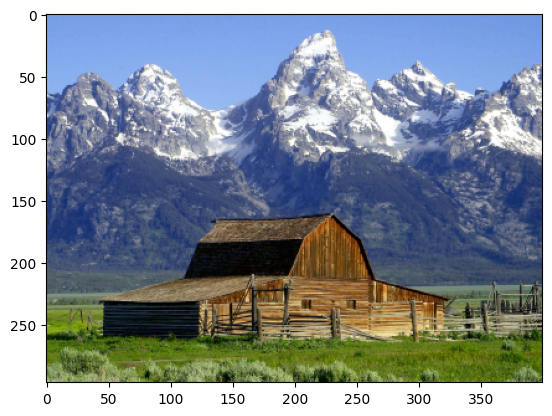

In [101]:
plt.imshow(img)

# Configurar o display da imagem

Text(0.5, 1.0, 'My image')

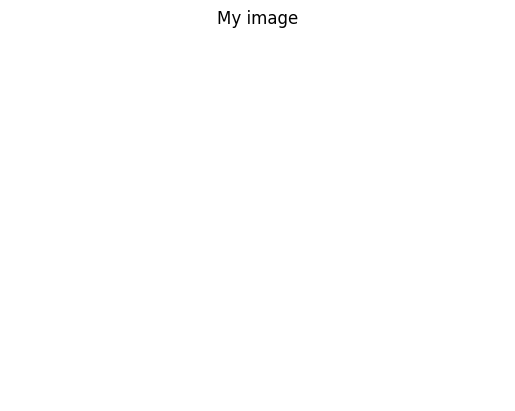

In [102]:
plt.axis("off")
plt.title("My image")

# Mostrar outra imagem

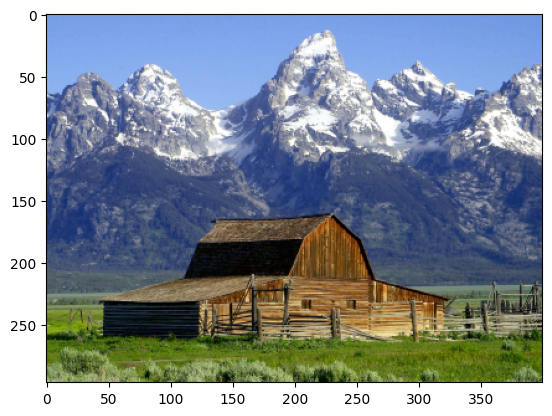

In [103]:
plt.figure()
plt.imshow(img)

# Numpy

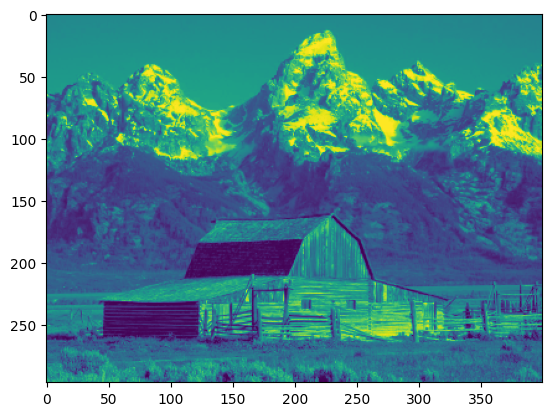

In [104]:
import numpy as np

R = img[:,:,0] # vai buscar o canal vermelho
G = img[:,:,1] # vai buscar o canal verde
B = img[:,:,2] # vai buscar o canal azul

plt.imshow(R)

Foi buscar o canal vermelho mas o default do matplotlib são 3 canais por isso não funcionou.  
Para isso precisamos de isolar o canal usando um colormap.

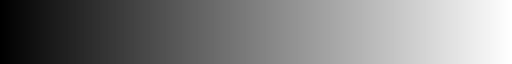

In [105]:
import matplotlib.colors as clr

cmGray = clr.LinearSegmentedColormap.from_list("gray", [(0.0, 0.0, 0.0), (1.0, 1.0, 1.0)], 256)

cmGray

Façamos agora um colormap vermelho, verde e azul:

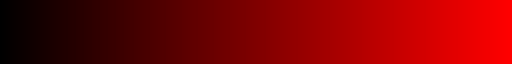

In [106]:
cmRed = clr.LinearSegmentedColormap.from_list("red", [(0.0, 0.0, 0.0), (1.0, 0.0, 0.0)], 256)
cmGreen = clr.LinearSegmentedColormap.from_list("green", [(0.0, 0.0, 0.0), (0.0, 1.0, 0.0)], 256)
cmBlue = clr.LinearSegmentedColormap.from_list("blue", [(0.0, 0.0, 0.0), (0.0, 0.0, 1.0)], 256)

cmRed

Vamos visualizar a imagem com as diferentes cores

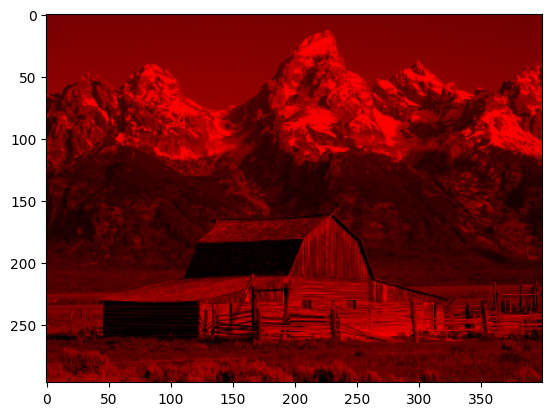

In [107]:
plt.imshow(R, cmRed)

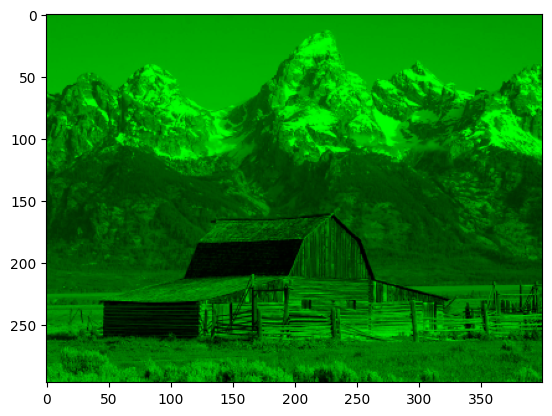

In [108]:
plt.imshow(G, cmGreen)

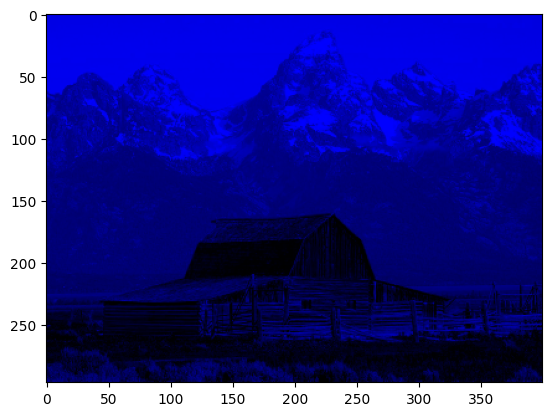

In [109]:
plt.imshow(B, cmBlue)

# Juntar os 3 diferentes canais
Para reconstruir a imagem

In [110]:
[nl, nc, nCh] = img.shape

nl, nc, nCh

(297, 400, 3)

Alocar espaço para uma imagem do tamanho guardado por nl, nc e nCh

In [111]:
imgRec = np.zeros((nl,nc,nCh))

imgRec.shape

(297, 400, 3)

Reconstruir a imagem

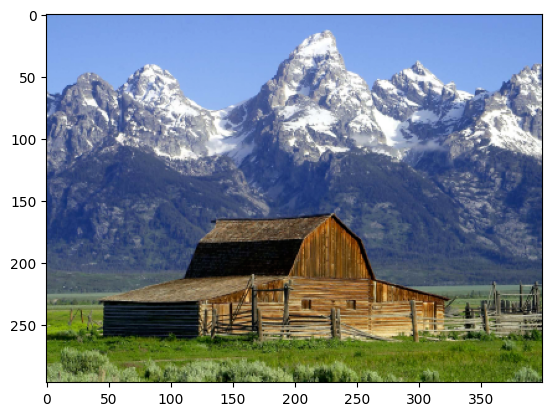

In [112]:
imgRec[:,:,0] = R / 255
imgRec[:,:,1] = G / 255
imgRec[:,:,2] = B / 255

plt.imshow(imgRec)

Padding para a imagem

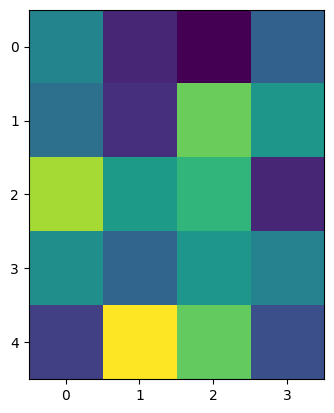

In [113]:
x = np.random.rand(5,4)

plt.imshow(x)

In [114]:
nl, nc = x.shape

nl, nc

(5, 4)

In [115]:
nnl = 8 - nl % 8

nnl

3

Para criar uma linha horizontal para a imagem tem que se criar um novo eixo usando o numpy

In [116]:
ll = x[nl-1, :][np.newaxis, :]

ll.shape

(1, 4)

In [117]:
rep = ll.repeat(nnl, axis=0) # repetir horizontalmente

rep

array([[0.21413344, 0.98472584, 0.75806701, 0.26814372],
       [0.21413344, 0.98472584, 0.75806701, 0.26814372],
       [0.21413344, 0.98472584, 0.75806701, 0.26814372]])

Coloquemos, então, o rep por baixo do x

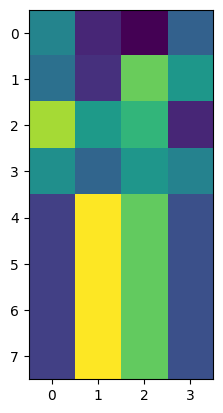

In [118]:
xp = np.vstack([x, rep])

plt.imshow(xp)

Recuperemos a imagem original

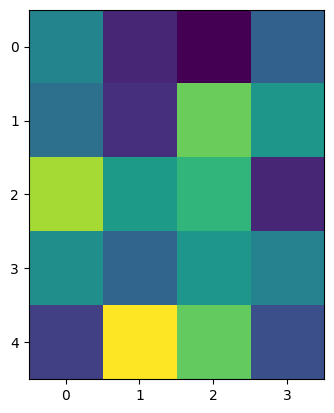

In [119]:
xr = xp[:nl, :nc]

plt.imshow(xr)

Passar para YCbCr

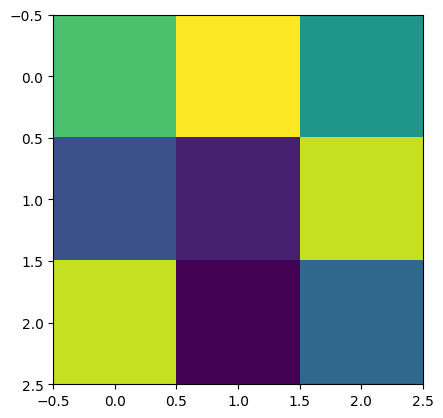

In [127]:
T = np.array(
    [
        [0.299, 0.587, 0.114],
        [-0.168736, -0.331264, 0.5],
        [0.5, -0.418688, -0.081312],
    ]
)

plt.imshow(T)

Calcular as componentes Y, Cb e Cr

In [128]:
Y = T[0,0]*R + T[0,1]*G + T[0,2]*B

Y

array([[152.889, 152.889, 152.889, ..., 146.59 , 146.59 , 146.59 ],
       [152.889, 152.889, 152.889, ..., 146.59 , 146.59 , 146.59 ],
       [152.889, 152.889, 152.889, ..., 146.59 , 148.889, 148.889],
       ...,
       [152.696, 175.653, 131.408, ..., 145.5  ,  90.255, 110.711],
       [167.408, 169.767, 185.793, ..., 110.825,  60.281,  58.264],
       [152.556, 181.821, 169.277, ..., 126.047,  68.563, 133.503]])

In [129]:
Cb = (B - Y) / 1.1772 + 128

Cb

array([[194.35321101, 194.35321101, 194.35321101, ..., 194.60720353,
        194.60720353, 194.60720353],
       [194.35321101, 194.35321101, 194.35321101, ..., 194.60720353,
        194.60720353, 194.60720353],
       [194.35321101, 194.35321101, 194.35321101, ..., 194.60720353,
        194.35321101, 194.35321101],
       ...,
       [ 89.18246687,  86.67057424,  89.42711519, ...,  90.19843697,
         92.95497791,  95.96551138],
       [ 89.42711519,  87.42320761,  94.19690792, ...,  96.71814475,
         99.72867822, 103.9904859 ],
       [ 81.6561332 ,  89.92575603,  92.9362895 , ..., 102.47587496,
        103.73649337, 105.48640843]])

In [130]:
Cr = (R - Y) / 1.402 + 128

Cr

array([[102.40156919, 102.40156919, 102.40156919, ..., 101.90156919,
        101.90156919, 101.90156919],
       [102.40156919, 102.40156919, 102.40156919, ..., 101.90156919,
        101.90156919, 101.90156919],
       [102.40156919, 102.40156919, 102.40156919, ..., 101.90156919,
        102.40156919, 102.40156919],
       ...,
       [121.79743224, 122.54136947, 122.71611983, ..., 119.79743224,
        119.9721826 , 119.64693295],
       [122.71611983, 122.46005706, 121.72824536, ..., 119.56562054,
        119.2403709 , 119.25249643],
       [122.61055635, 123.13480742, 122.80955777, ..., 120.83380884,
        119.75249643, 120.5085592 ]])

In [131]:
Ti = np.linalg.inv(T)

Ti

array([[ 1.00000000e+00, -1.21889419e-06,  1.40199959e+00],
       [ 1.00000000e+00, -3.44135678e-01, -7.14136156e-01],
       [ 1.00000000e+00,  1.77200007e+00,  4.06298063e-07]])

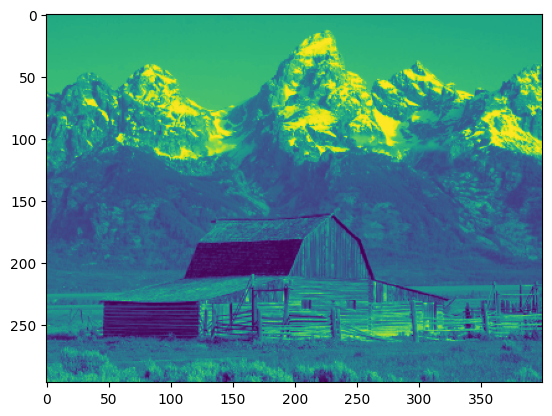

In [132]:
Rrec = Ti[0,0]*Y + Ti[0,1]*(Cb-128) + Ti[0,1]*(Cr-128)
Rrec[Rrec > 255] = 255

Rrec = np.round(Rrec).astype(np.uint8)

plt.imshow(Rrec)